In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

In [40]:
df = pd.read_csv('income.csv')

df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


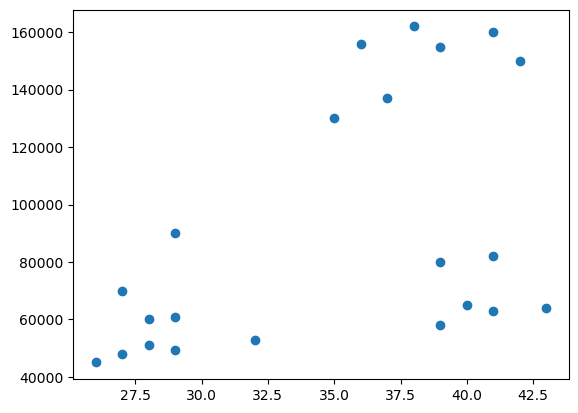

In [41]:
plt.scatter(df['Age'], df['Income($)'])

In [42]:
km = KMeans(n_clusters=3)

km

KMeans(n_clusters=3)

In [43]:
y_predicted = km.fit_predict(df[['Age', 'Income($)']])

y_predicted

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [44]:
df['cluster'] = y_predicted

df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


In [45]:
df1 = df[df['cluster'] == 0]
df2 = df[df['cluster'] == 1]
df3 = df[df['cluster'] == 2]

df1.head()

,Name,Age,Income($),cluster
2,Mohan,29,61000,0
3,Ismail,28,60000,0
11,Tom,26,45000,0
12,Arnold,27,48000,0
13,Jared,28,51000,0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


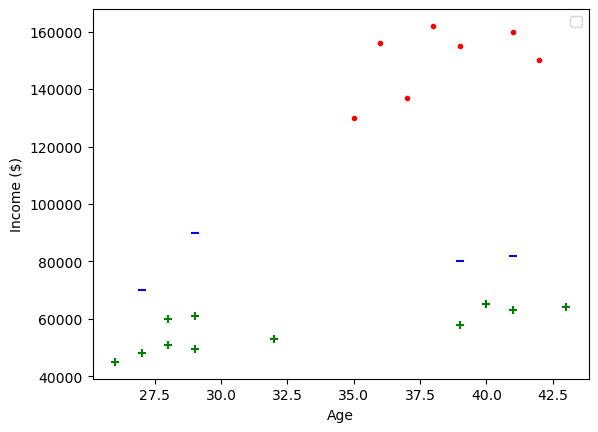

In [46]:
plt.scatter(df1['Age'], df1['Income($)'], color='green', marker='+')
plt.scatter(df2['Age'], df2['Income($)'], color='red', marker='.')
plt.scatter(df3['Age'], df3['Income($)'], color='blue', marker='_')
plt.xlabel("Age")
plt.ylabel("Income ($)")
plt.legend()

In [54]:
scaler = MinMaxScaler()

scaler.fit(df[['Income($)']])

df['Income($)'] = scaler.transform(df[['Income($)']])

age_scaler = MinMaxScaler()

age_scaler.fit(df[['Age']])

df['Age'] = age_scaler.transform(df[['Age']])

df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


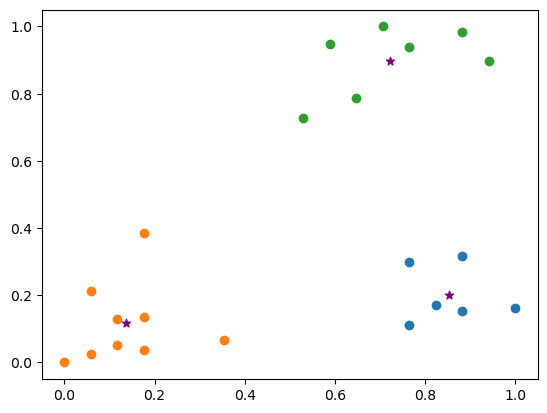

In [74]:
min_max_kmeans = KMeans(n_clusters=3)

y_predicted_minmax_kmeans = min_max_kmeans.fit_predict(df[['Age', 'Income($)']])

df['cluster'] = y_predicted_minmax_kmeans

minmax_df0 = df[df['cluster'] == 0]
minmax_df1 = df[df['cluster'] == 1]
minmax_df2 = df[df['cluster'] == 2]

plt.scatter(minmax_df0['Age'], minmax_df0['Income($)'])
plt.scatter(minmax_df1['Age'], minmax_df1['Income($)'])
plt.scatter(minmax_df2['Age'], minmax_df2['Income($)'])


cluster_centers = min_max_kmeans.cluster_centers_

plt.scatter(cluster_centers[:,0], cluster_centers[:,1], color='purple', marker='*')

In [81]:
k_rng = range(1, 10)

sse = []

for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age', 'Income($)']])
    sse.append(km.inertia_) # gives us the sse
sse

c:\Users\flyin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[5.434011511988176,
 2.0911363886990766,
 0.4750783498553095,
 0.3491047094419565,
 0.26217927623452125,
 0.2105547899547249,
 0.17840674931327927,
 0.13781880133764024,
 0.1099581688308657]

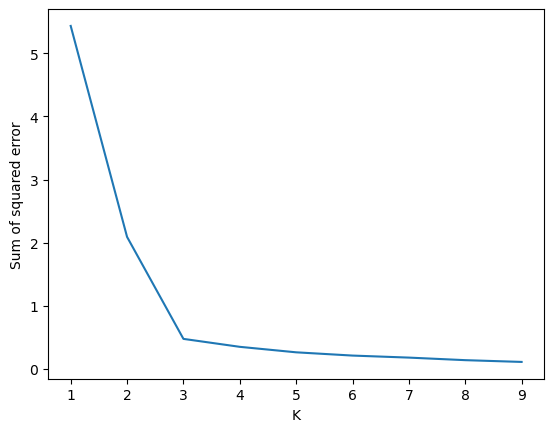

In [82]:
plt.xlabel("K")
plt.ylabel("Sum of squared error")
plt.plot(k_rng, sse)